# Importing the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

# Data Splitting

In [2]:
train_dir = 'C:/Users/aksha/Desktop/DIP_pr/Dataset_updated/train'
test_dir = 'C:/Users/aksha/Desktop/DIP_pr/Dataset_updated/test'

batch_size = 32

# Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # Resize images to 150x150 pixels
    batch_size=batch_size,           # Number of images to yield from the generator per batch
    class_mode='binary',     # Binary classification (defective vs good tires)
    shuffle=True             # Shuffle the dataset
)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False            # Do not shuffle the test set
)


Found 1484 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


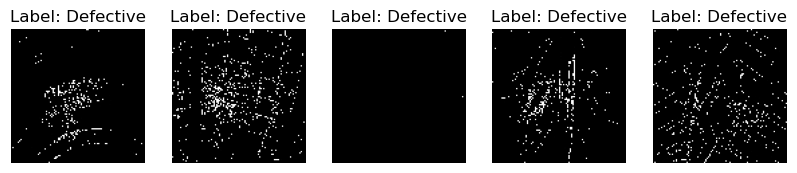

In [3]:
# Get a batch of images and labels
sample_images, sample_labels = next(train_generator)

# Plot the first 5 images from the batch
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title('Label: {}'.format('Defective' if sample_labels[i] == 1 else 'Good'))
    plt.axis('off')
plt.show()


# Setup CNN Architecture

In [12]:
# number of possible label values
nb_classes = 2
lr = 0.001

base_model = InceptionV3(input_shape = (100, 100, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_378 (Conv2D)            (None, 49, 49, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_378 (Batch  (None, 49, 49, 32)  96          ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                            

# Train the model

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,  # Calculate steps per epoch
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size  # Calculate validation steps
)




# Optionally, save the trained model
#model.save('efficientnet_model.h5')

Epoch 1/20
46/46 [==============================] - 60s 1s/step - loss: 0.7009 - acc: 0.5923 - val_loss: 0.5868 - val_acc: 0.6790
Epoch 2/20
46/46 [==============================] - 56s 1s/step - loss: 0.6090 - acc: 0.6791 - val_loss: 0.5626 - val_acc: 0.6932
Epoch 3/20
46/46 [==============================] - 55s 1s/step - loss: 0.5602 - acc: 0.7245 - val_loss: 0.5812 - val_acc: 0.6761
Epoch 4/20
46/46 [==============================] - 55s 1s/step - loss: 0.5247 - acc: 0.7142 - val_loss: 0.5318 - val_acc: 0.7273
Epoch 5/20
46/46 [==============================] - 55s 1s/step - loss: 0.5083 - acc: 0.7266 - val_loss: 0.5198 - val_acc: 0.7301
Epoch 6/20
46/46 [==============================] - 53s 1s/step - loss: 0.4883 - acc: 0.7521 - val_loss: 0.5334 - val_acc: 0.7216
Epoch 7/20
46/46 [==============================] - 53s 1s/step - loss: 0.4662 - acc: 0.7851 - val_loss: 0.5486 - val_acc: 0.7102
Epoch 8/20
46/46 [==============================] - 53s 1s/step - loss: 0.4368 - acc: 0.77

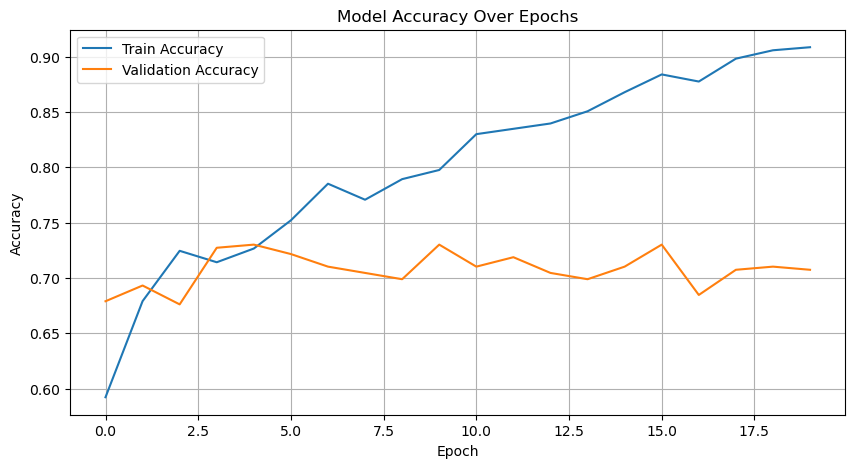

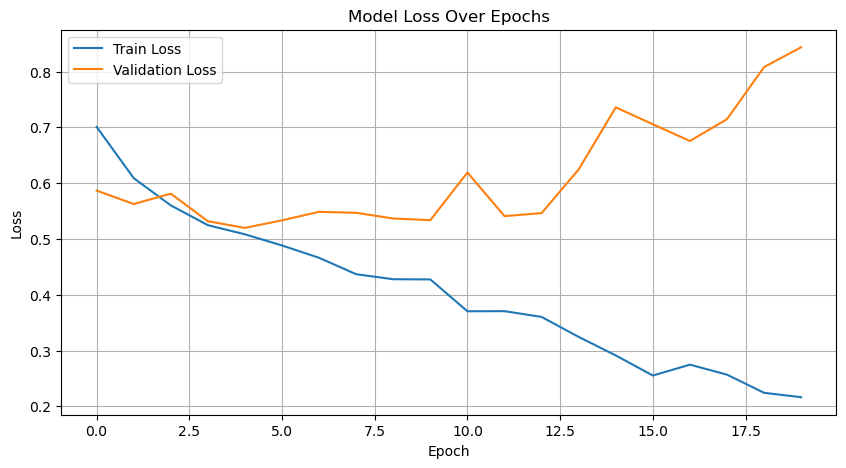

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [15]:
model.save('tire_model.h5')
model.save('tire_model.keras')